In [1]:
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import csv
import numpy as np
from datetime import datetime

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
data = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/experiment_1_logs.csv', error_bad_lines=False)
data = data.drop(columns=data.columns[17:])
data = data[['timeStamp','elapsed','label','success']]
subset = data[['timeStamp','elapsed']].apply(pd.to_numeric, errors='coerce').dropna()
subset['label'] = data[['label']]
subset['timeStamp'] = (subset['timeStamp']*1000000).astype(np.int64)
subset['toDate'] = pd.to_datetime(subset['timeStamp'], format="%Y-%m-%d %H:%M:%S.%f", errors='coerce')
subset['datetime'] = subset['toDate']
subset = subset.set_index('toDate')
subset = subset[subset.index.notna()]
subset = subset.loc['2022', ["elapsed","label","datetime"]]
subset = subset[~(subset['elapsed'] >= 17500)]
subset = subset.loc[subset.elapsed.isin(subset.elapsed.nlargest(n=78451))]
subset['func_counts'] = subset['label'].map(subset['label'].value_counts())
subset = subset.loc[subset['func_counts'].isin(subset['func_counts'].nlargest(n=1).tolist())]
subset['counter'] = range(1,len(subset)+1)
subset = subset.set_index('counter')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (21,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Mean:  3452.7454111108405
Std:  2120.600016571515


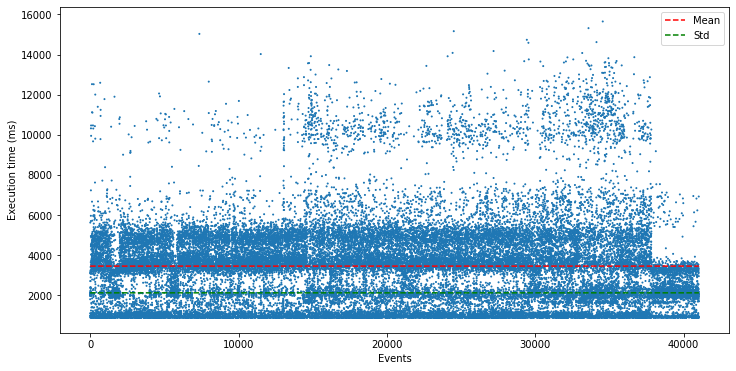

In [3]:
print("Mean: ", subset['elapsed'].mean())
print("Std: ", subset['elapsed'].std())

s = [1**n for n in range(len(subset.elapsed))]
fig, ax = plt.subplots(figsize=(12,6))

# Calculate the simple average of the data
y_mean = [np.mean(subset.elapsed)]*len(subset.elapsed)
y_std = [np.std(subset.elapsed)]*len(subset.elapsed)
# Plot the average line
mean_line = ax.plot(subset.index,y_mean, label='Mean', linestyle='--', color='red')
std_line = ax.plot(subset.index,y_std, label='Std', linestyle='--', color='green')

ax.scatter(subset.index,subset.elapsed,s=s)

# Make a legend
legend = ax.legend(loc='upper right')
ax.set_xlabel('Events')
ax.set_ylabel('Execution time (ms)')

plt.show()

In [4]:
len(subset)

41023

In [ ]:
subset.to_csv('gdrive/My Drive/Colab Notebooks/data/cleaned_experiment_1_logs.csv', sep=',', encoding='utf-8')